# ***GAUSSIAN MIXTURE MODEL AND EM-ALGORITHM FOR IRIS DATASET***

##  ***lOADING NEEDED LIBRARIES***

In [1]:
library(mclust) ## Use for BIC criteria and EM algorithm
library(Rmixmod) ## For Clasification
library(dbscan) # For density based clustering
library(factoextra) # Clustering Visualization
library(ggplot2) # For visualization
library(GGally)  # For visualization
library(ggpubr)   # For visualization

Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: Rcpp

Rmixmod v. 2.1.9 / URI: www.mixmod.org


Attaching package: 'dbscan'


The following object is masked from 'package:stats':

    as.dendrogram


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
# Clear the workspace:
rm(list =ls())

In [4]:
# Load Iris Dataset
data(iris)

In [8]:
# Quick Glance with data, some basic information!!
# head(iris) # Displays some of the first lines in data

table(iris$Species) # Showing the count of each species in the Iris dataset.
summary(iris) # Statistical summary of the data. Mean, Median, Minimum and Maximum.. 
## for each parameter

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa



    setosa versicolor  virginica 
        50         50         50 

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# ***VISUALIZING THE IRIS DATASET***


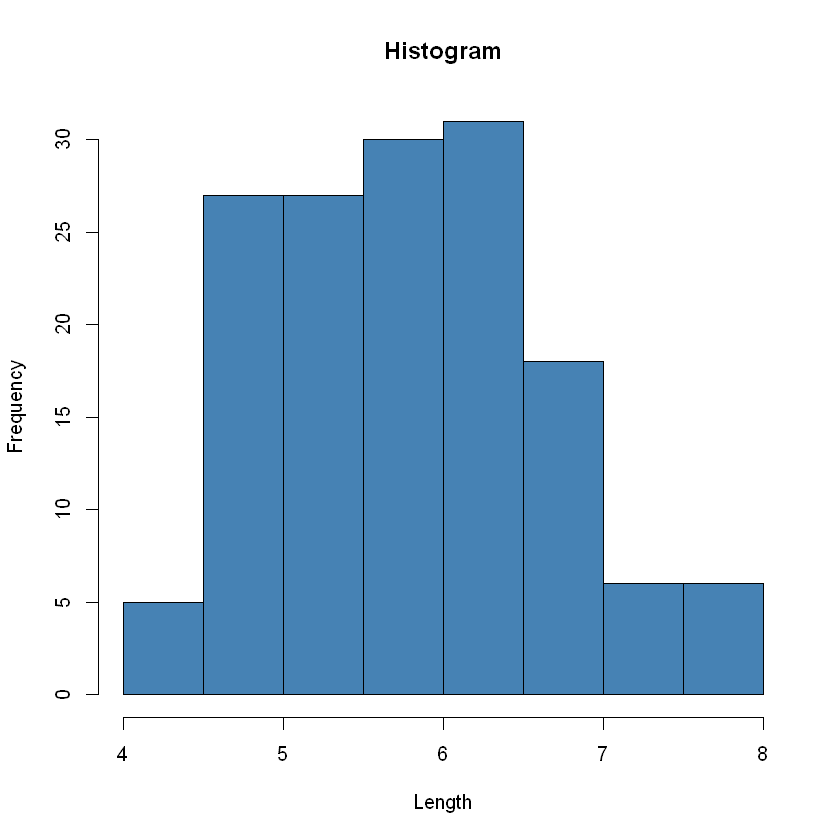

In [10]:
#create histogram of values for sepal length
hist(iris$Sepal.Length,
     col='steelblue',
     main='Histogram',
     xlab='Length',
     ylab='Frequency')

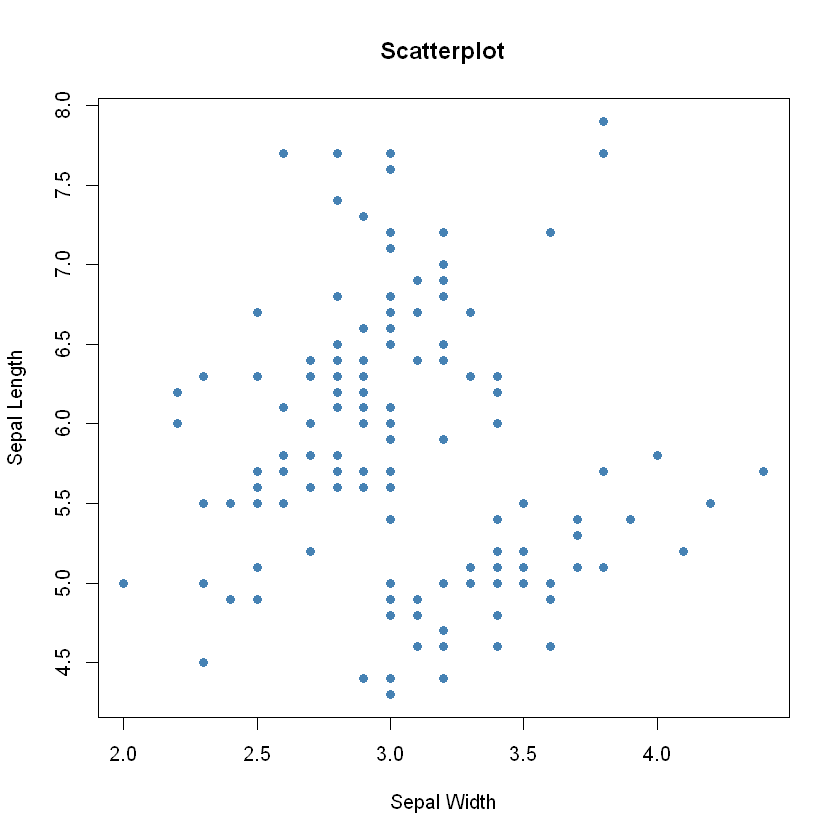

In [19]:
#create scatterplot of sepal width vs. sepal length
plot(iris$Sepal.Width, iris$Sepal.Length,
     col='steelblue',
     main='Scatterplot',
     xlab='Sepal Width',
     ylab='Sepal Length',
     pch=19)

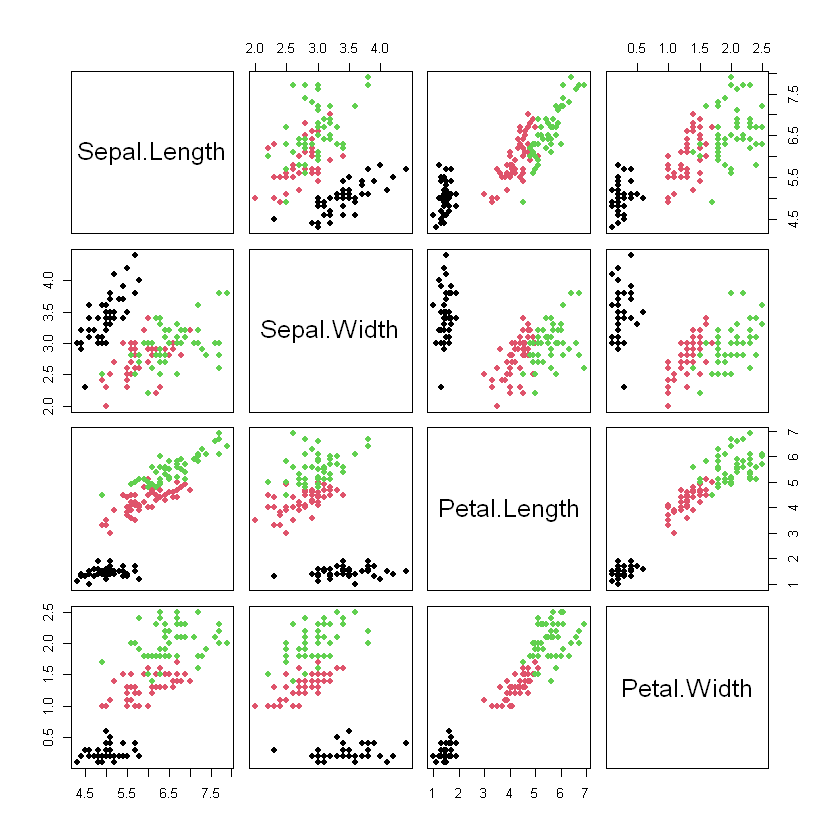

In [20]:
# Create a scatter plot matrix
pairs(iris[, 1:4], pch = 16, col = iris$Species)


# ***FITTING MODEL***


### ***CHOOSING MODEL WITH 2 CLUSTERS BASE ON BIC CRITERIA***


In [29]:
#Choose the model
BIC <- mclustBIC(iris[,-5])

# Fit Model-Based clustering using the selected model
mBIC1 = Mclust(iris[-5], x = BIC)

# Summarize the model
summary(mBIC1, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood   n df       BIC       ICL
       -215.726 150 26 -561.7285 -561.7289

Clustering table:
  1   2 
 50 100 

Mixing probabilities:
        1         2 
0.3333319 0.6666681 

Means:
                  [,1]     [,2]
Sepal.Length 5.0060022 6.261996
Sepal.Width  3.4280049 2.871999
Petal.Length 1.4620007 4.905992
Petal.Width  0.2459998 1.675997

Variances:
[,,1]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.15065114  0.13080115   0.02084463  0.01309107
Sepal.Width    0.13080115  0.17604529   0.01603245  0.01221458
Petal.Length   0.02084463  0.01603245   0.02808260  0.00601568
Petal.Width    0.01309107  0.01221458   0.00601568  0.01042365
[,,2]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  

In [31]:
# Matrix of mean values for each variable and each cluster
colnames(mBIC1$parameters$mean) <- c("Cluster 1", "Cluster 2")
(mBIC1$parameters$mean)

,Cluster 1,Cluster 2
Sepal.Length,5.0060022,6.261996
Sepal.Width,3.4280049,2.871999
Petal.Length,1.4620007,4.905992
Petal.Width,0.2459998,1.675997


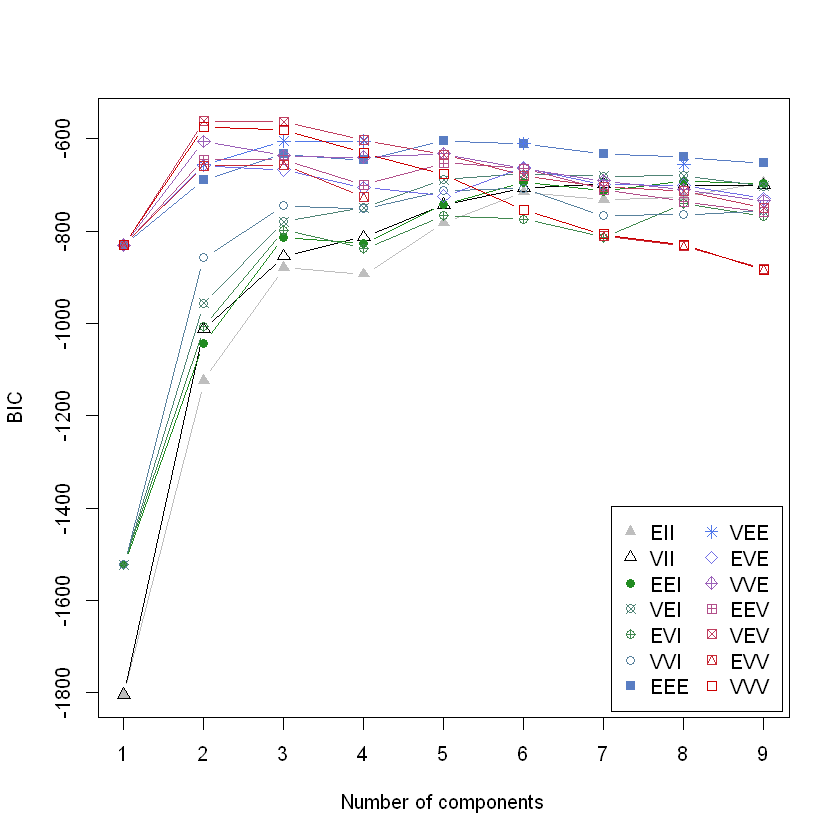

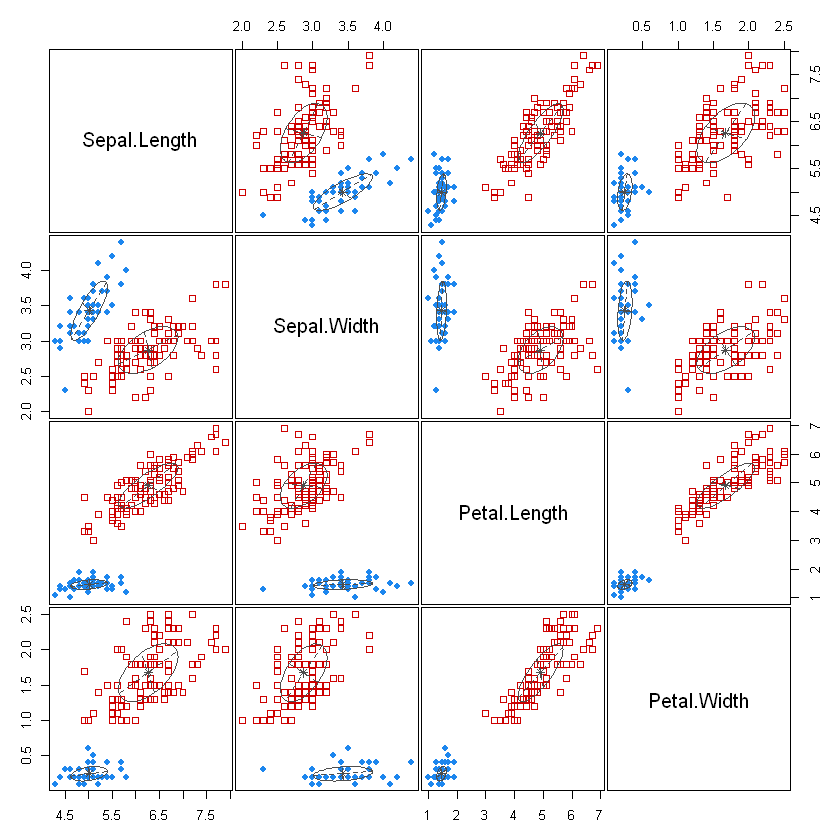

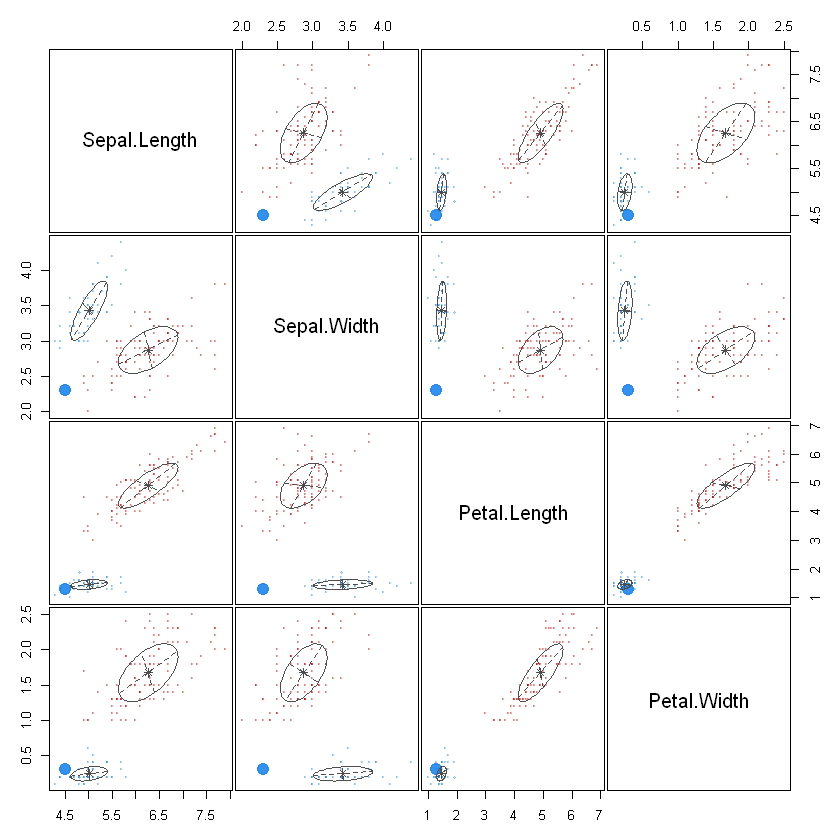

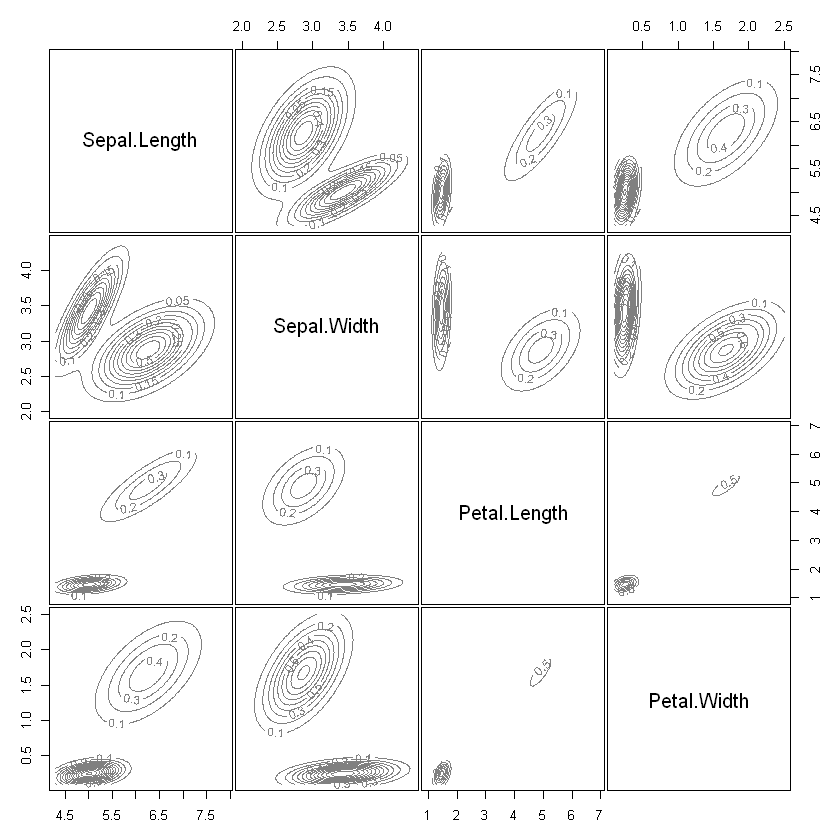

In [32]:
plot(mBIC1)

In [33]:
# Create a frequency table to compare actual Species with model-based classification
classification_table <- table(iris$Species, mBIC1$classification)
print(classification_table)

            
              1  2
  setosa     50  0
  versicolor  0 50
  virginica   0 50


### ***CHOOSING MODEL WITH 3 CLUSTERS***

In [34]:
# Fit Model-Based clustering with 3 groups and VEV covariance type
mBIC2 <- Mclust(iris[-5], G = 3, modelNames = "VEV")

# Summarize the model
summary(mBIC2, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

Mixing probabilities:
        1         2         3 
0.3333333 0.3005423 0.3661243 

Means:
              [,1]     [,2]     [,3]
Sepal.Length 5.006 5.915044 6.546807
Sepal.Width  3.428 2.777451 2.949613
Petal.Length 1.462 4.204002 5.482252
Petal.Width  0.246 1.298935 1.985523

Variances:
[,,1]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.13320850  0.10938369  0.019191764 0.011585649
Sepal.Width    0.10938369  0.15495369  0.012096999 0.010010130
Petal.Length   0.01919176  0.01209700  0.028275400 0.005818274
Petal.Width    0.01158565  0.01001013  0.005818274 0.010695632
[,,2]
             Sepal.Length Sepa

In [35]:
# Matrix of mean values for each variable and each cluster
colnames(mBIC2$parameters$mean) <- c("Cluster 1", "Cluster 2", "Cluster 3")
(mBIC2$parameters$mean)

,Cluster 1,Cluster 2,Cluster 3
Sepal.Length,5.006,5.915044,6.546807
Sepal.Width,3.428,2.777451,2.949613
Petal.Length,1.462,4.204002,5.482252
Petal.Width,0.246,1.298935,1.985523


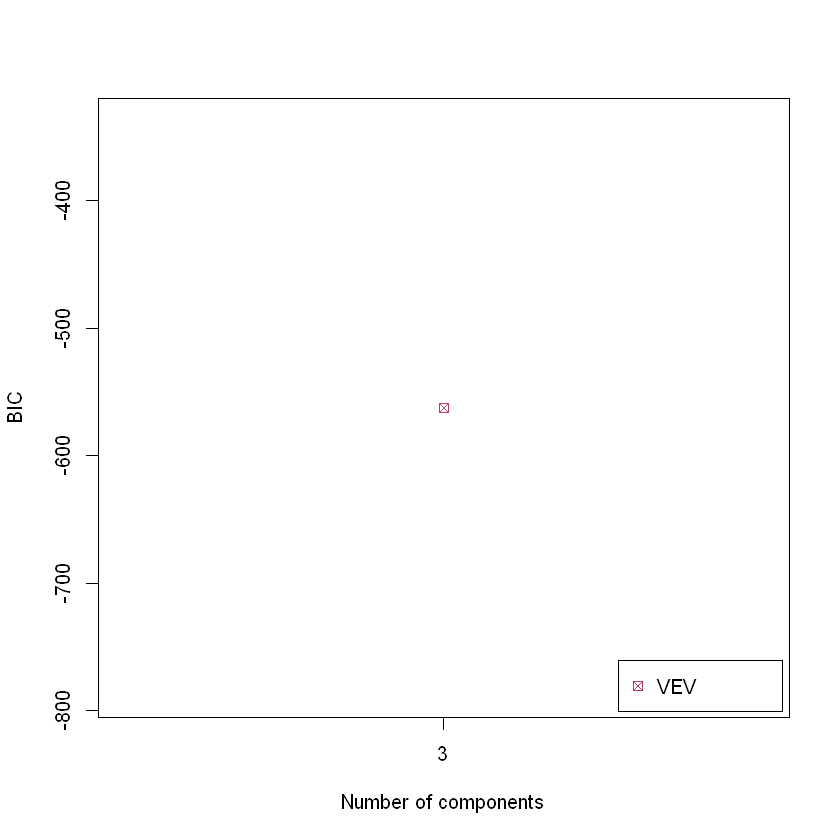

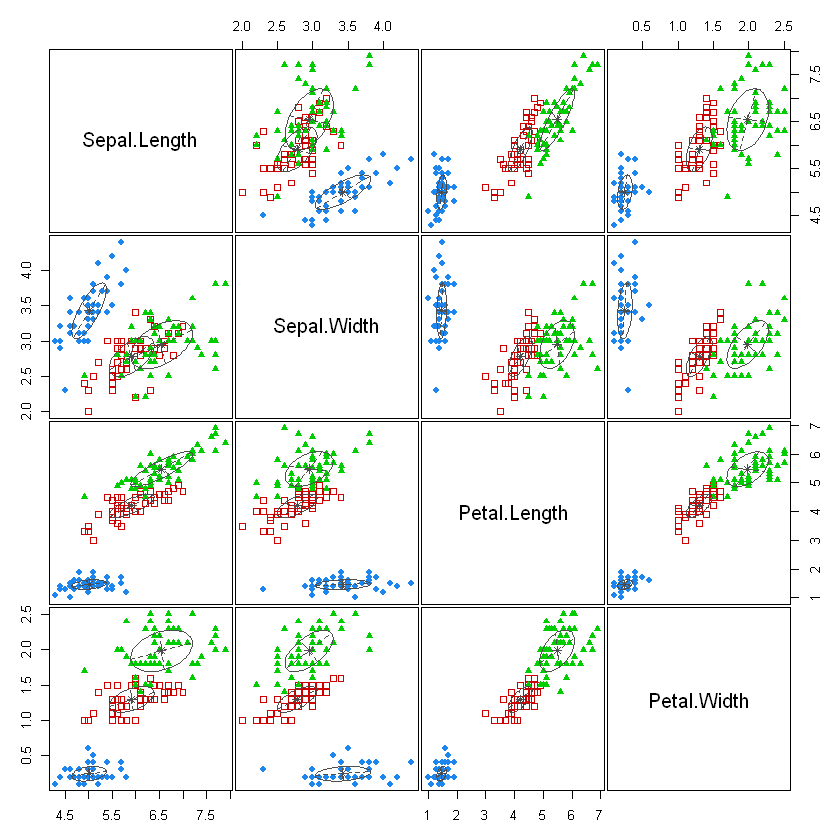

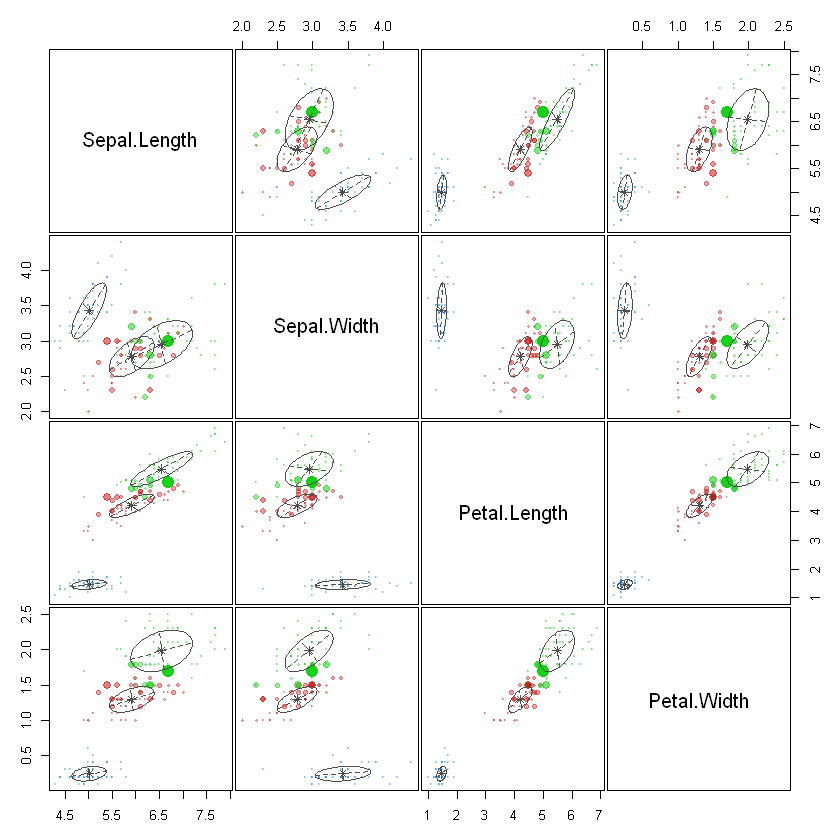

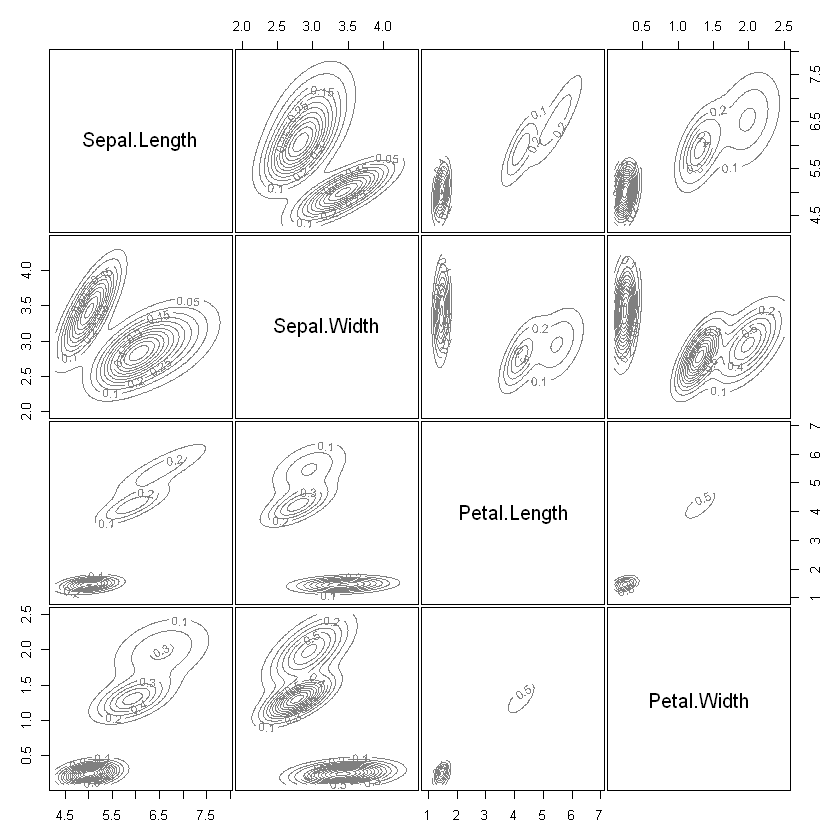

In [36]:
plot(mBIC2)

In [37]:
table(iris$Species, mBIC2$classification)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50